In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import welch

In [2]:
def get_avg(x,block=10):
    res=np.zeros((x.shape[0]//block),dtype=x.dtype)
    for i in range(res.shape[0]):
        res[i] = np.mean(x[i*block:(i+1)*block],axis=0)
    return res

def get_adev(x,tau,stidx=0,endidx=None):
    dt=4096/250e6
    delta=int(tau/dt)
#     print(delta)
    sl=slice(stidx,endidx,delta)
    samps=x[sl]
#     print(samps)
    adev=np.sqrt(np.mean((samps[2:]-2*samps[1:-1]+samps[:-2])**2)/(2*tau**2))
    return adev

In [3]:
nrows=1
ncols=10000000
np.random.seed(42)
dat=np.random.randn(nrows*ncols).reshape(nrows,ncols)
nn = np.random.randn(nrows*ncols).reshape(nrows,ncols)*1e-11
rwlks = np.cumsum(dat,axis=1)*1e-11

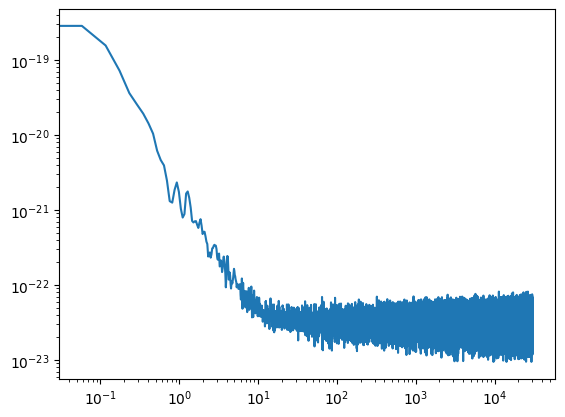

In [162]:
scale1=0.08
scale2=100
noise = scale1*rwlks[0,:] + scale2*nn[0,:]
ps=welch(noise,fs=61035,window='blackmanharris',scaling='density',nperseg=2**20)
plt.loglog(ps[0],ps[1])

In [163]:
get_adev(noise,0.16)

1.0650893900459161e-08

In [164]:
ph_noise = 2*np.pi*112e6*noise

In [165]:
#orbcomm phase is 10 rad in 500 muchunks = 500*10000 spectra
cnum=np.arange(len(ph_noise))
y=(10/(500*10000))*cnum + ph_noise
vis=np.exp(1j*y)
pp=np.angle(np.exp(1j*y))

In [173]:
r=get_avg(np.real(vis),block=10000)
im=get_avg(np.imag(vis),block=10000)
new_vis = r + 1j*im
newpp=np.angle(new_vis)
uwp=np.unwrap(newpp)

stddev 0.20739003364721328


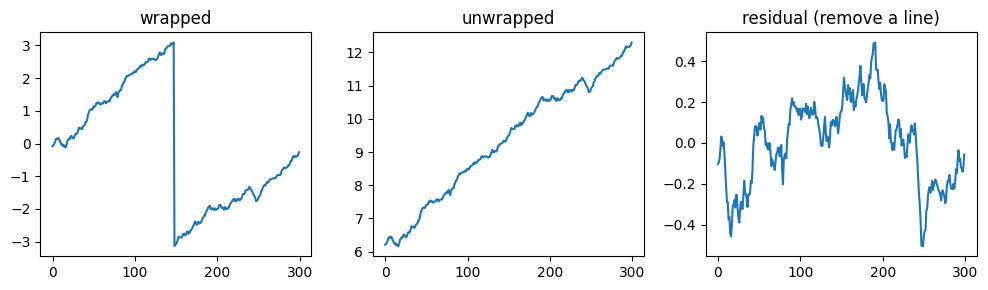

In [174]:
f=plt.gcf()
f.set_size_inches(10,3)
newpp=newpp[350:650]
uwp=uwp[350:650]
plt.subplot(131)
plt.title("wrapped")
plt.plot(newpp[:])
plt.subplot(132)
plt.title("unwrapped")
plt.plot(uwp)
m,c=np.polyfit(np.arange(len(uwp)),uwp,1)
err=uwp-m*np.arange(len(uwp))+c
plt.subplot(133)
plt.title("residual (remove a line)")
plt.plot(err-err.mean())
print("stddev", np.std(err))
plt.tight_layout()

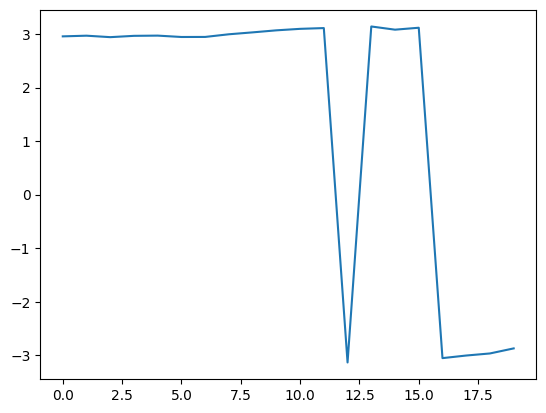

In [148]:
plt.plot(newpp[200:220])

In [149]:
newpp[200:220]

array([ 2.95624002,  2.96893998,  2.94155117,  2.96604659,  2.97027354,
        2.94464969,  2.9456692 ,  2.9952964 ,  3.03097392,  3.06889082,
        3.09672224,  3.11110171, -3.13436655,  3.14095311,  3.08129847,
        3.11734726, -3.05300955, -3.00461031, -2.96582424, -2.87141562])

In [127]:
avg_noise = get_avg(ph_noise,block=10000)

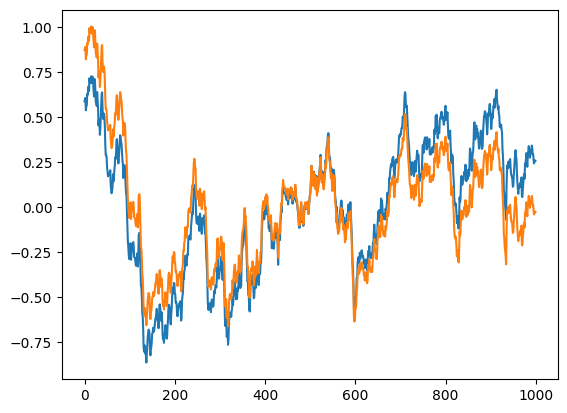

In [130]:
plt.plot(avg_noise-np.mean(avg_noise))
plt.plot(err-np.mean(err))

In [131]:
corrected_vis = new_vis * np.exp(-1j*avg_noise)
newpp2=np.angle(corrected_vis)
uwp2=np.unwrap(newpp2)

stddev 1.988556271847215e-06


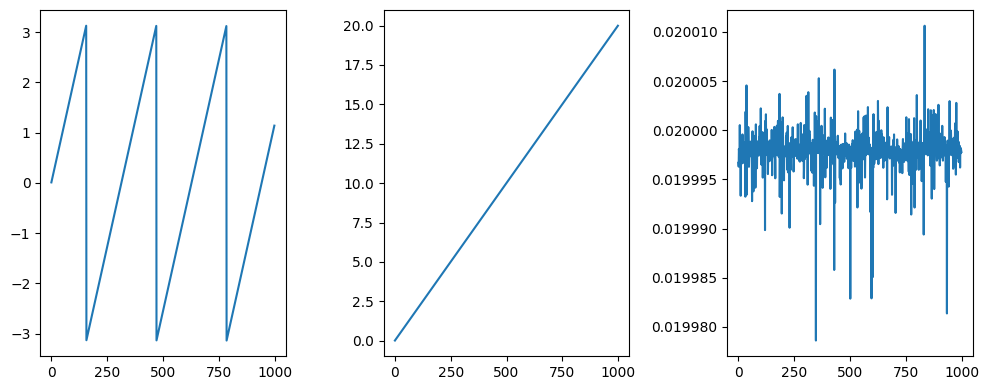

In [134]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(131)
plt.plot(newpp2[:])
plt.subplot(132)
plt.plot(uwp2)
m,c=np.polyfit(np.arange(len(uwp2)),uwp2,1)
err2=uwp2-m*np.arange(len(uwp2))+c
plt.subplot(133)
plt.plot(err2)
print("stddev", np.std(err2))
plt.tight_layout()

In [ ]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.plot(rwlks[0,:])
plt.title("random walk")
plt.subplot(122)
plt.title("random walk w white noise")
plt.plot(rwlks_wnoise[0,:])

In [ ]:
block=100
avg=get_avg(rwlks_wnoise[0,:],block=block)
avg_x = np.arange(avg.shape[0])*block + block//2

In [ ]:
plt.plot(rwlks[0,:])
plt.plot(avg_x,avg, 'o',alpha=0.8)
# plt.xlim(100,500)